<a href="https://colab.research.google.com/github/AnnayanB/SupervisedML_RetailSalePrediction/blob/main/RetailSalesPrediction_SupervisedML_Annayan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

**Problem Description**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

**Data Description**

**Rossmann Stores Data.csv** - historical data including Sales
**store.csv** - supplemental information about the stores
Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.
Id - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open
StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Importing the datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/Almabetter_Capstone/RetailSalePrediction_SupervisedML_Annayan/Rossmann Stores Data.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/Almabetter_Capstone/RetailSalePrediction_SupervisedML_Annayan/store.csv')

In [6]:
# Size of our first dataset
dataset1.shape

(1017209, 9)

In [7]:
# Size of our second dataset
dataset2.shape

(1115, 10)

In [8]:
# First look on the first dataset
dataset1.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [9]:
# First look on the second dataset
dataset2.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [10]:
#Unique stores in first dataset
dataset1['Store'].nunique()

1115

In [11]:
#Unique stores in first dataset
dataset2['Store'].nunique()

1115

**So our dataset1 has multiple values for the 1115 unique stores. We will now merge both the datasets**

In [12]:
# Applying inner join on the store column
sale_df = pd.merge(dataset1, dataset2, how='inner',left_on='Store',right_on='Store')

In [13]:
sale_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [14]:
sale_df.shape

(1017209, 18)

In [15]:
# Glance on the now combined dataset
pd.set_option('display.max_columns', 18)
sale_df.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [16]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [17]:
sale_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,509178
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,293122
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,NaN
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,NaN
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,NaN


In [18]:
# Check any duplicate rows
len(sale_df[sale_df.duplicated()])

0

In [20]:
sale_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

# **Missing value treatment**

In [21]:
sale_df.isnull().sum().sum()

2173431

In [22]:
sale_df['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [23]:
sale_df['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

In [24]:
sale_df['Promo2SinceWeek'].isnull().sum().sum()

508031

In [25]:
sale_df['Promo2SinceYear'].isnull().sum().sum()

508031

**All the stores who are not participating in the Promo2 scheme have null in their corresponding Promo2SinceWeek and Promo2SinceYear cells. So we will fill 0s in all those cells.**

In [26]:
sale_df['Promo2SinceWeek'] = sale_df['Promo2SinceWeek'].fillna(0)
sale_df['Promo2SinceYear'] = sale_df['Promo2SinceYear'].fillna(0)
sale_df['PromoInterval'] = sale_df['PromoInterval'].fillna(0)

In [27]:
sale_df['PromoInterval'].isnull().sum().sum()

0

In [28]:
sale_df['Promo2SinceWeek'].isnull().sum().sum()

0

In [29]:
sale_df['Promo2SinceYear'].isnull().sum().sum()

0

**There are no null values now in Promo2SinceWeek and Promo2SinceYear.** 

In [30]:
sale_df['CompetitionDistance'].isnull().sum().sum()

2642

In [31]:
#All continous variables in cont_col
cont_col = sale_df.columns[(sale_df.dtypes=="float64")|(sale_df.dtypes=="int64")].tolist()
print(cont_col)

#All categorical var in cat_col
cat_col = sale_df.select_dtypes(exclude=np.number).columns.tolist()
print(cat_col)

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']
['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']


Text(0.5, 0, 'Competition Distance Distribution Plot')

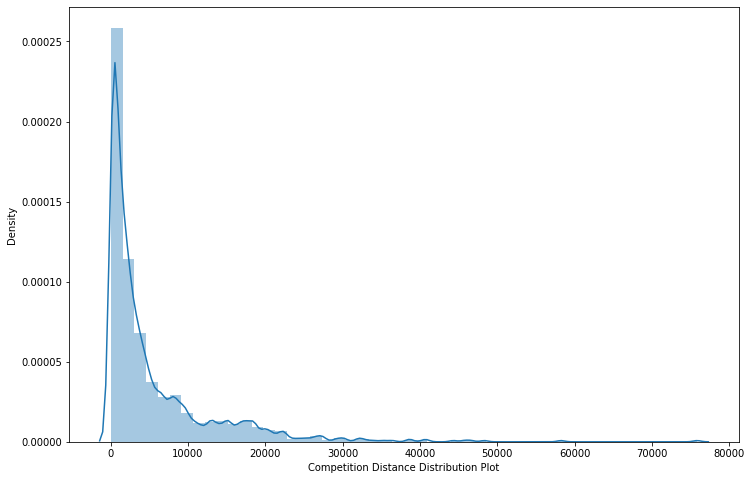

In [32]:
#distribution plot of competition distance
plt.figure(figsize=(12,8))
sns.distplot(x=sale_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

**It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect. So we will fill the nulls with median.**

In [33]:
#Filling the null values in CompetitionDistance with its median. 
sale_df['CompetitionDistance'] = sale_df['CompetitionDistance'].fillna(sale_df['CompetitionDistance'].median())

In [34]:
sale_df['CompetitionDistance'].isnull().sum().sum()

0

**Now, let's convert Date to a datecolumn and extract different parts of the date.**

In [35]:
sale_df['Date'] =  pd.to_datetime(sale_df['Date'], format='%Y-%m-%d')
sale_df['Year'] = sale_df['Date'].dt.year
sale_df['Month'] = sale_df['Date'].dt.month
sale_df['WeekOfYear'] = sale_df['Date'].dt.weekofyear
sale_df['DayOfYear'] = sale_df['Date'].dt.dayofyear
years = sale_df['Year'].unique()

In [36]:
sale_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,...,2008.0,0,0.0,0.0,0,2015,7,31,212
1,1,4,2015-07-30,5020,546,1,1,0,1,...,2008.0,0,0.0,0.0,0,2015,7,31,211
2,1,3,2015-07-29,4782,523,1,1,0,1,...,2008.0,0,0.0,0.0,0,2015,7,31,210
3,1,2,2015-07-28,5011,560,1,1,0,1,...,2008.0,0,0.0,0.0,0,2015,7,31,209
4,1,1,2015-07-27,6102,612,1,1,0,1,...,2008.0,0,0.0,0.0,0,2015,7,31,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,...,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,5
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,...,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,4
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,...,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,3
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,...,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,2


**Now we will fill the nulls present in CompetitionSinceMonth and CompetitionOpenSinceYear with the modes of their respective columns.**

In [37]:
sale_df['CompetitionOpenSinceMonth'].fillna(sale_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
sale_df['CompetitionOpenSinceYear'].fillna(sale_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

**Next, we can use the columns CompetitionOpenSince[Month/Year] columns from store_df to compute the number of months for which a competitor has been open near the store.**

In [38]:
sale_df['CompetitionOpen'] = 12 * (sale_df.Year - sale_df.CompetitionOpenSinceYear) + (sale_df.Month - sale_df.CompetitionOpenSinceMonth)
sale_df['CompetitionOpen'] = sale_df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [39]:
sale_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,...,0,0.0,0.0,0,2015,7,31,212,82.0
1,1,4,2015-07-30,5020,546,1,1,0,1,...,0,0.0,0.0,0,2015,7,31,211,82.0
2,1,3,2015-07-29,4782,523,1,1,0,1,...,0,0.0,0.0,0,2015,7,31,210,82.0
3,1,2,2015-07-28,5011,560,1,1,0,1,...,0,0.0,0.0,0,2015,7,31,209,82.0
4,1,1,2015-07-27,6102,612,1,1,0,1,...,0,0.0,0.0,0,2015,7,31,208,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,5,0.0
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,4,0.0
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,3,0.0
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,2,0.0


In [40]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [41]:
sale_df.isnull().sum().sum()

0

#**Exploratory Data** **Analysis**

**First we will find out the numerical features which we have in our dataset.**

In [42]:
numeric_features = sale_df.describe().columns
list(numeric_features)

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Year',
 'Month',
 'WeekOfYear',
 'DayOfYear',
 'CompetitionOpen']

In [43]:
unwanted = ['DayOfWeek','Open','Promo','SchoolHoliday','Promo2','Promo2SinceWeek','Promo2SinceYear','WeekOfYear','DayOfYear']
numeric_features = [e for e in numeric_features if e not in unwanted]
numeric_features

['Store',
 'Sales',
 'Customers',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Year',
 'Month',
 'CompetitionOpen']

**Plotting the histograms for each of the numerical columns.**

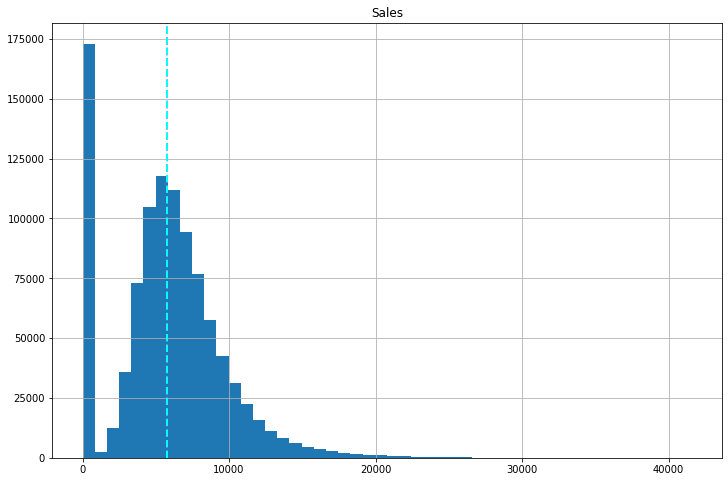

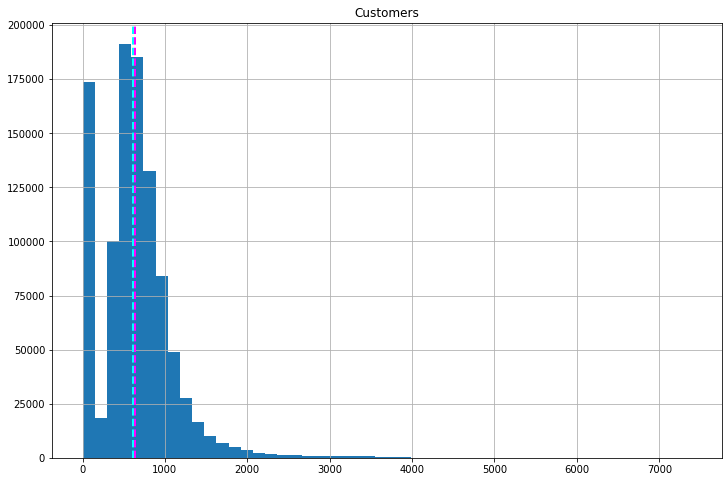

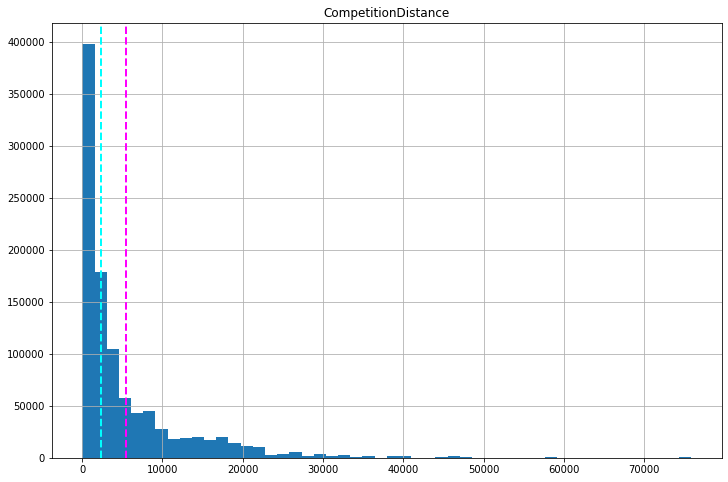

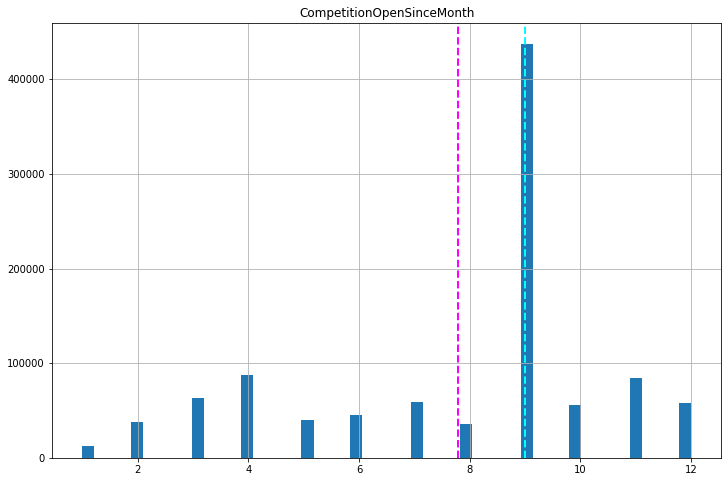

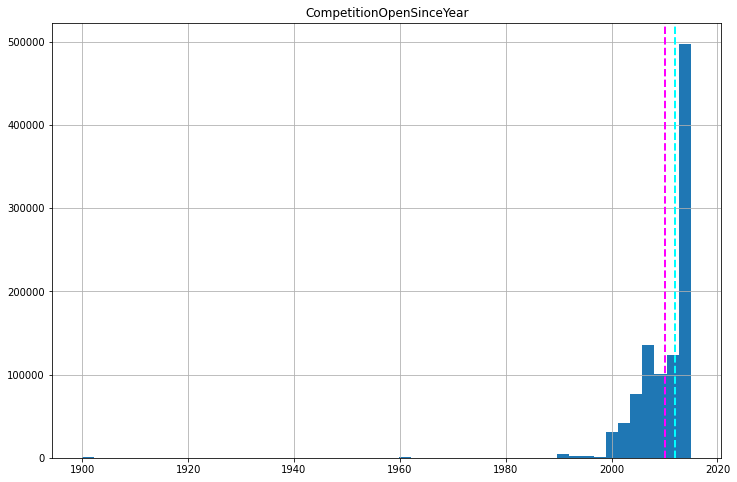

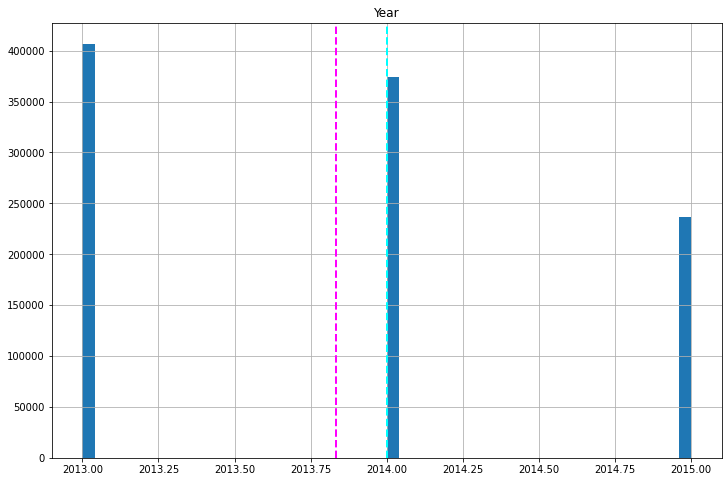

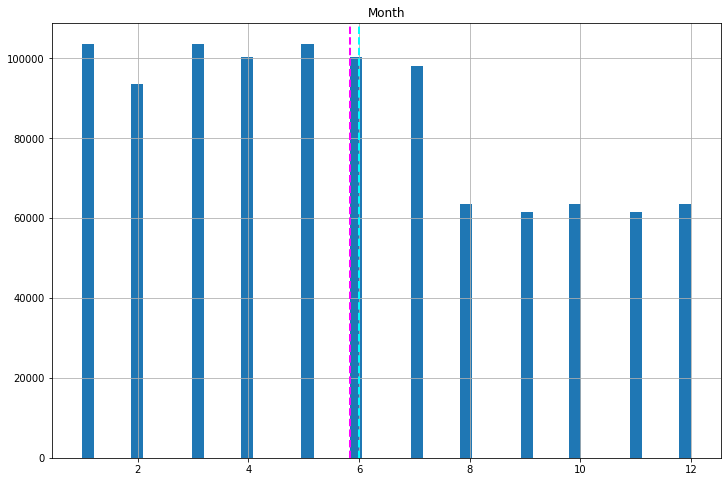

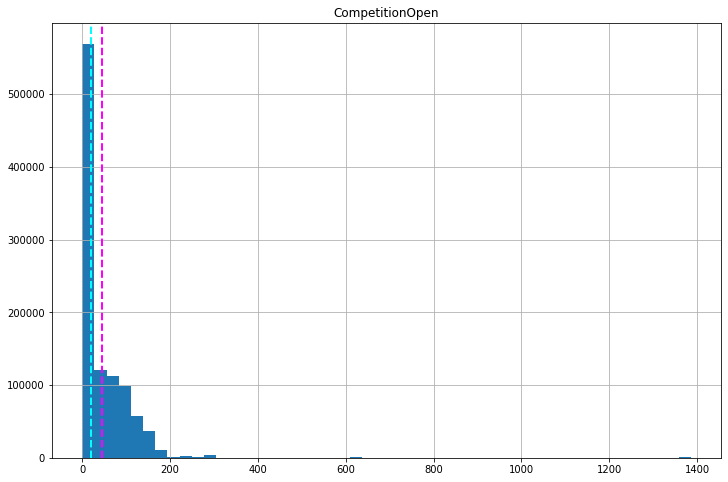

In [44]:

# plot a bar plot for each numerical feature count (except Store)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca()
    feature = sale_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# **Observations:**

1) Sales, Customers, CompetitionOpen, CompetitionDistance are positively skewed.

2) CompetitionOpenSinceYear is negatively skewed.

3) Count of the customers who are visiting stores mainly lies b/w 1000 - 1200.

4) Most of the competitions are within 10 km range.

#**Sales with Time**

In [45]:
sale_df['Year'].unique()

array([2015, 2014, 2013])

In [46]:
#sales over the years
sales_df_2013 = sale_df[sale_df['Year']== 2013]
sales_df_2014 = sale_df[sale_df['Year']==2014]
sales_df_2015 = sale_df[sale_df['Year']== 2015]

In [47]:
#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

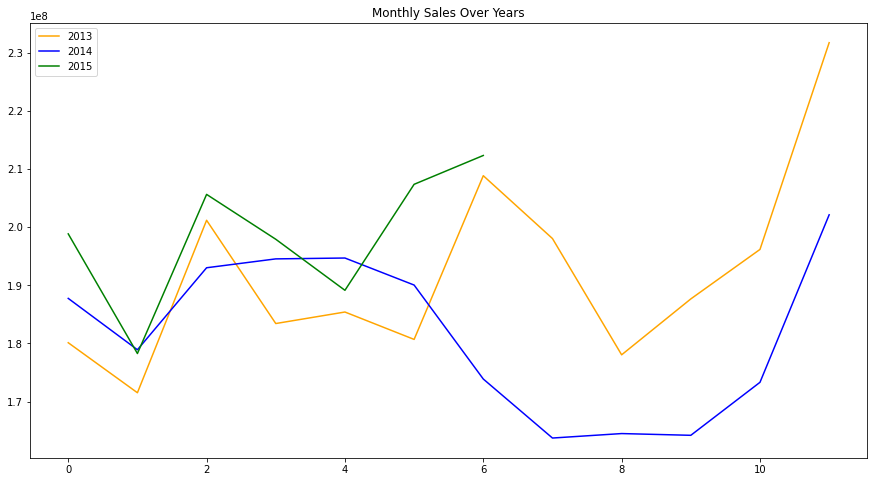

In [48]:
#plotting
plt.figure(figsize=(15, 8))
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

 # **Observation:**

**Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.**

**We will now draw the scatterplots of all the numerical features against the sales column.**

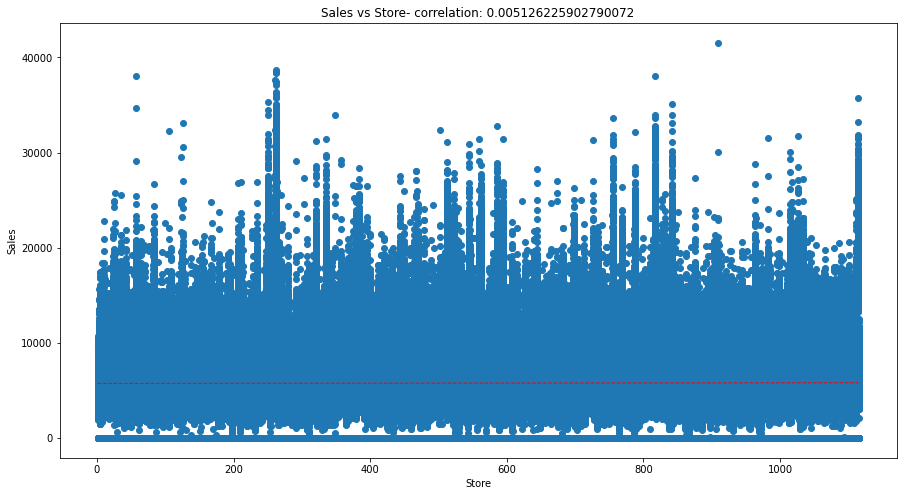

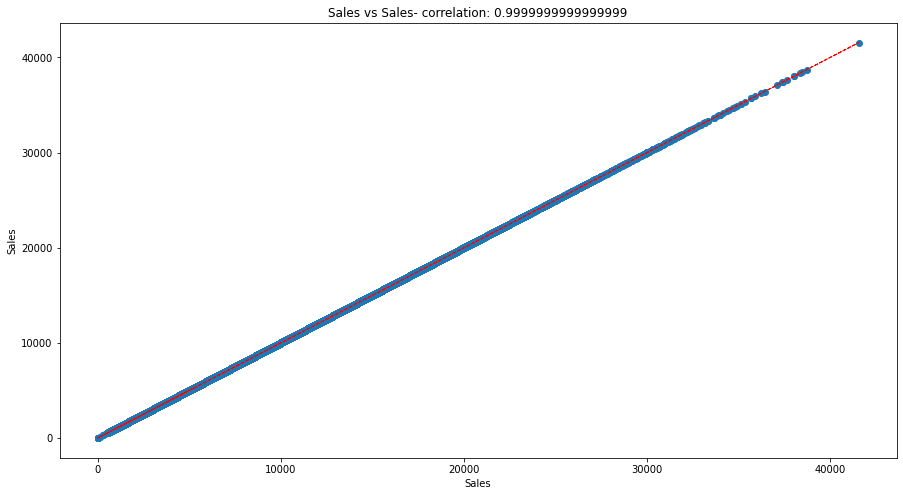

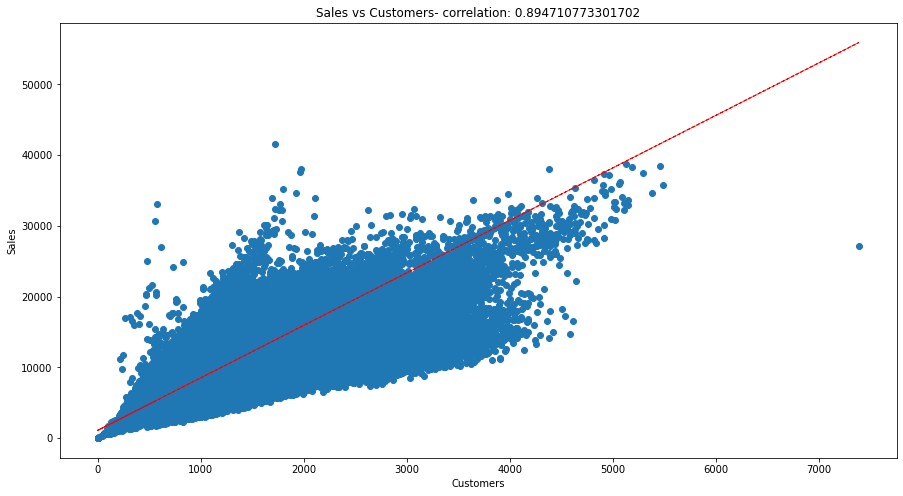

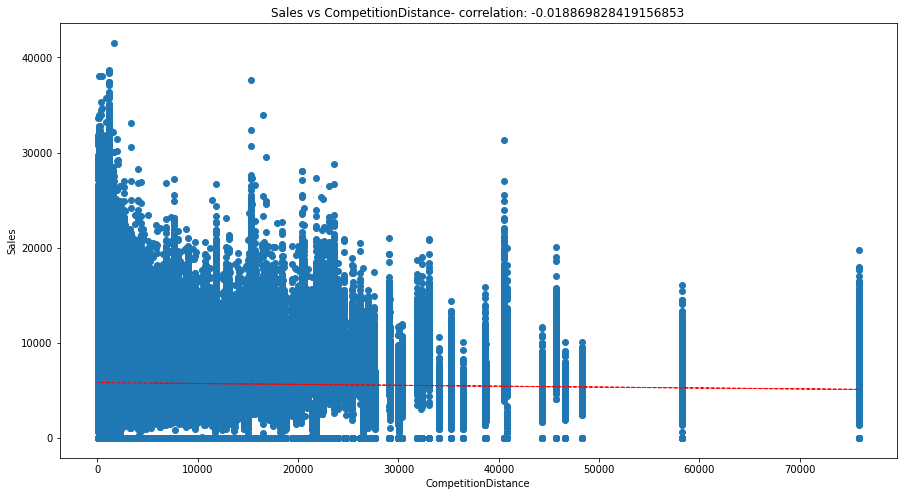

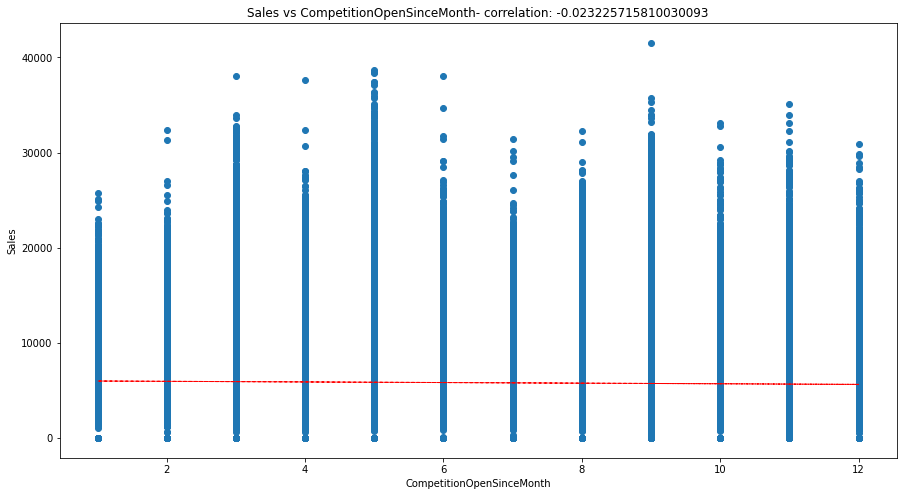

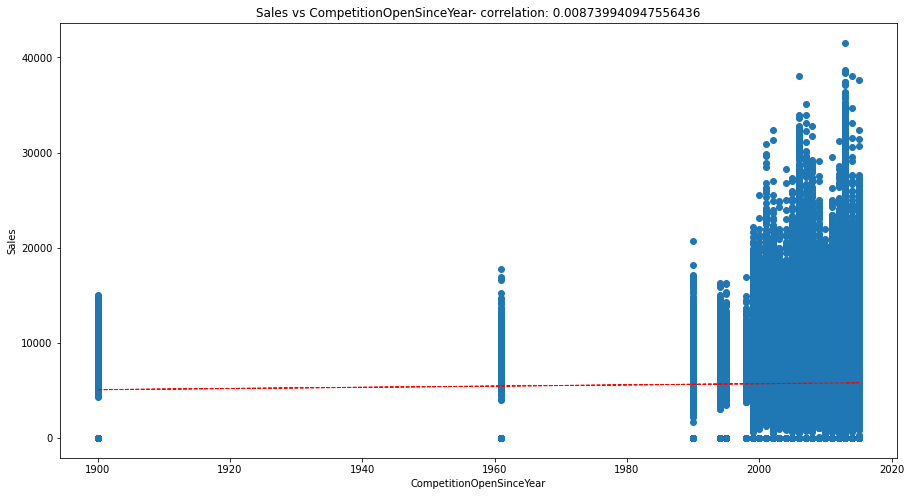

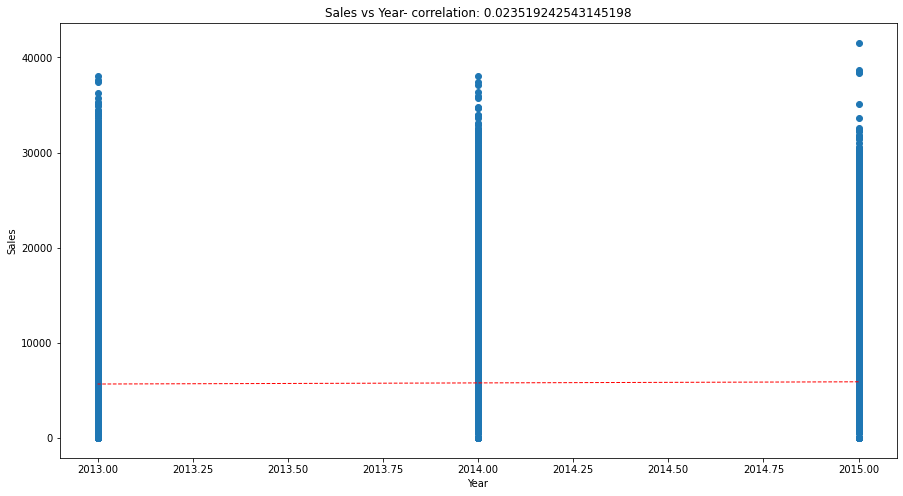

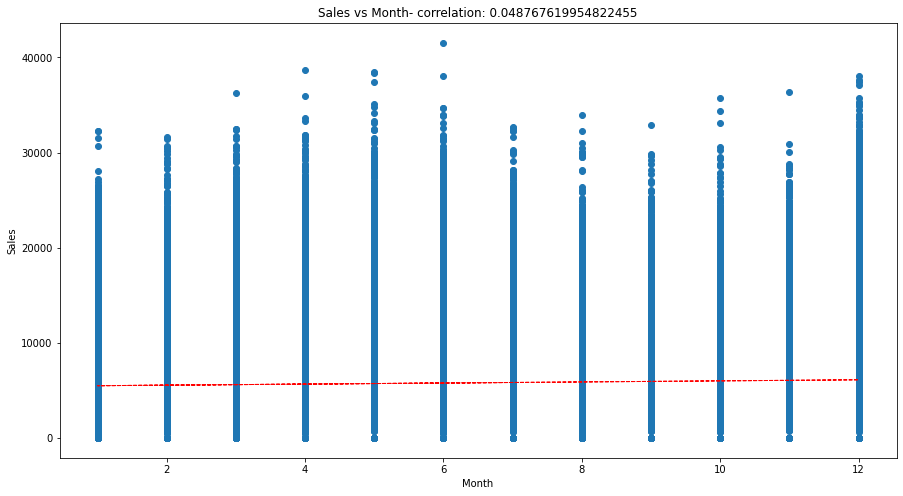

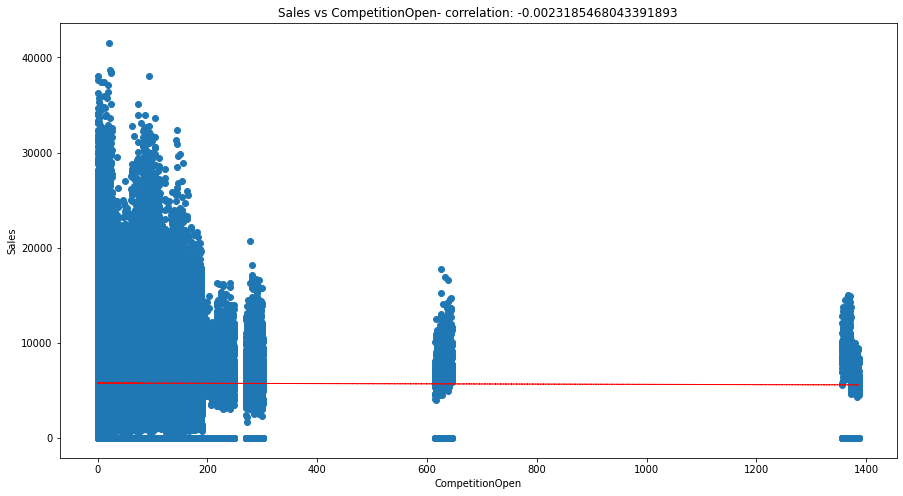

In [49]:
for col in numeric_features:
    fig = plt.figure(figsize=(15, 8))
    ax = fig.gca()
    feature = sale_df[col]
    label = sale_df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(sale_df[col], sale_df['Sales'], 1)
    y_hat = np.poly1d(z)(sale_df[col])

    plt.plot(sale_df[col], y_hat, "r--", lw=1)

plt.show()

#**Observations:**

1) **Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.**

2)**From the aforementioned scatter plot, it can be seen that the competitor stores were typically not that far apart, and the stores that were closely packed together experienced higher sales.**

**Now we will draw the bar plots for all the categorical columns.**

In [50]:
categorical_feature = sale_df.describe(include=['object','category']).columns
categorical_features = list(categorical_feature)
categorical_features

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [51]:
wanted = ['DayOfWeek','Open','Promo','SchoolHoliday','Promo2','Promo2SinceWeek','Promo2SinceYear']
categorical_features.extend(wanted)
categorical_features

['StateHoliday',
 'StoreType',
 'Assortment',
 'PromoInterval',
 'DayOfWeek',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [52]:
sale_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [53]:
sale_df['StateHoliday'].replace({'0':0},inplace=True)

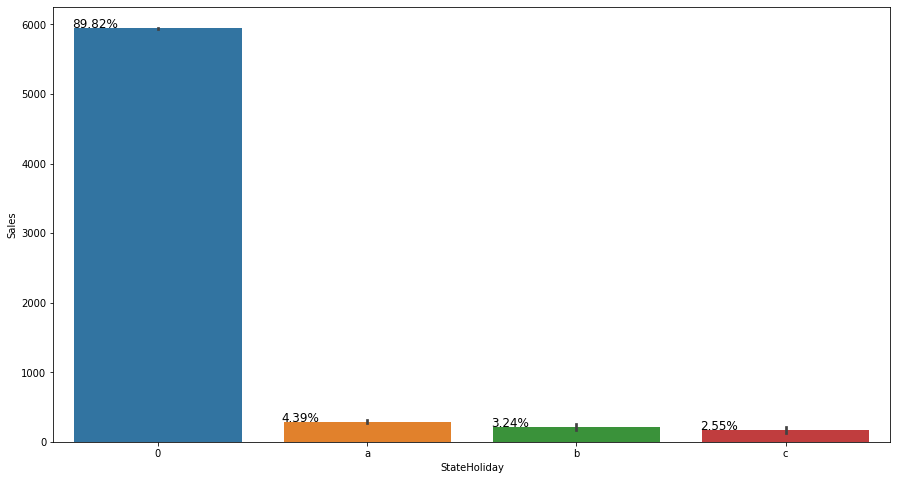

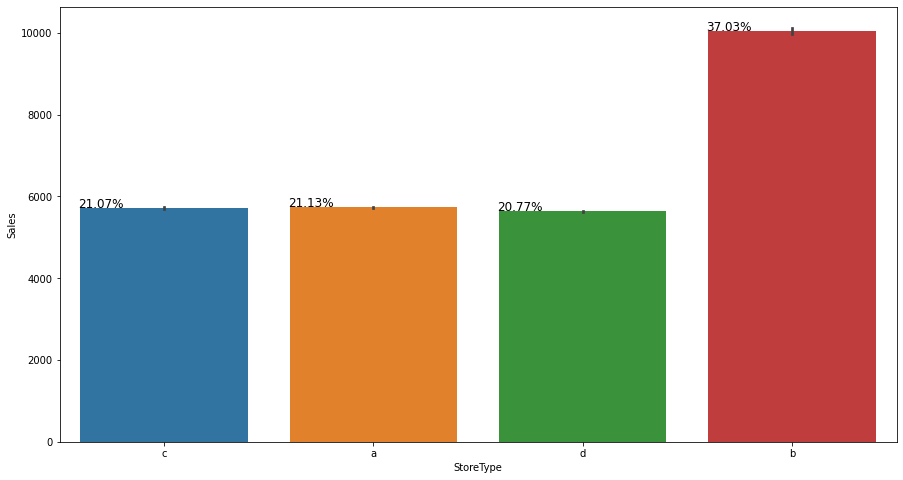

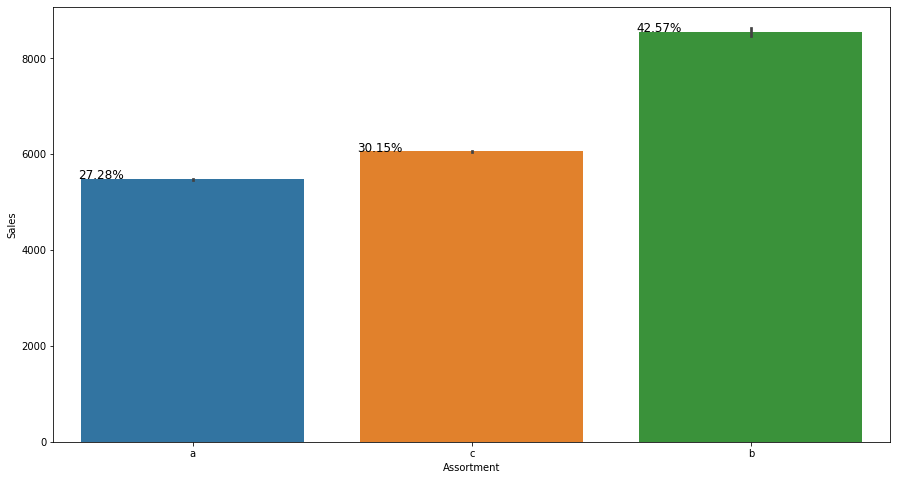

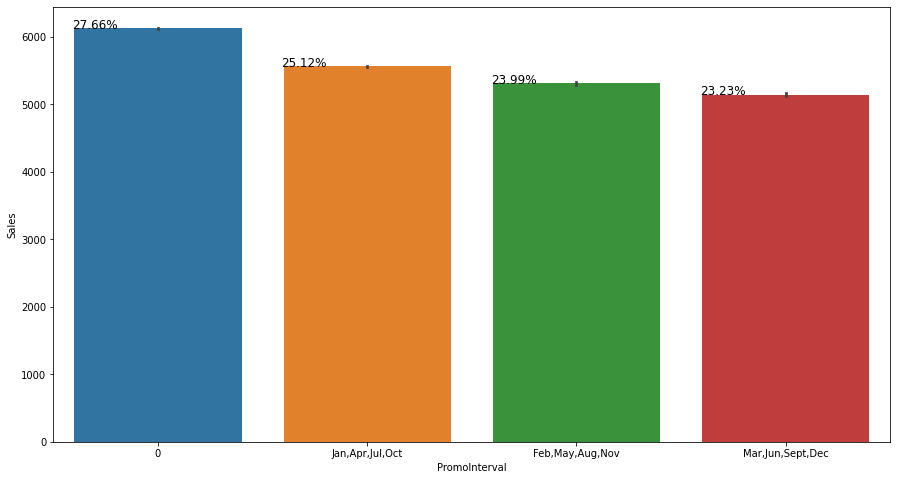

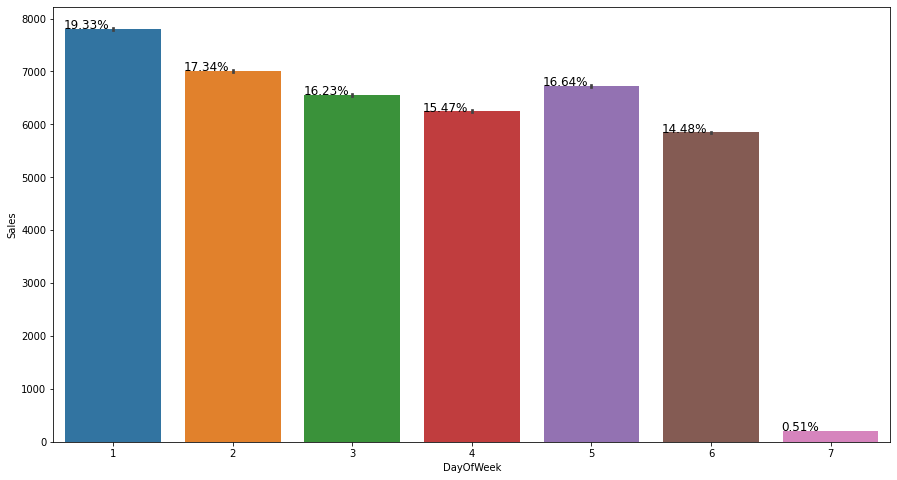

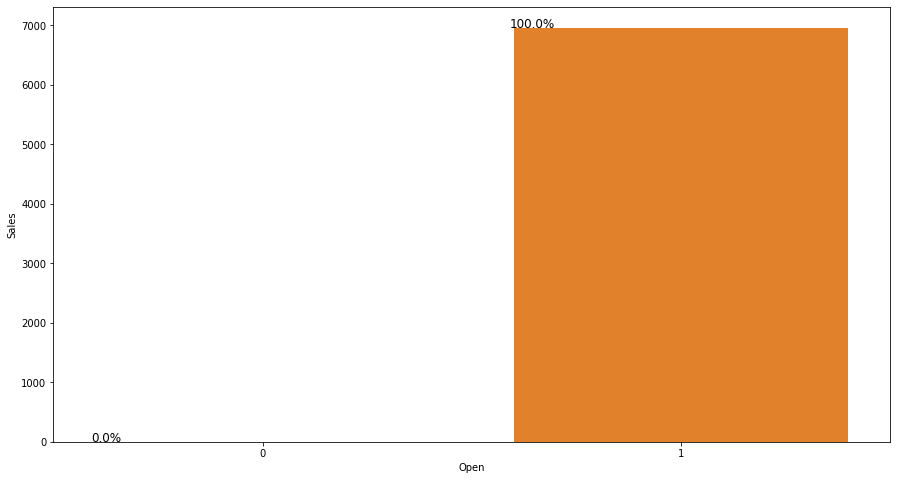

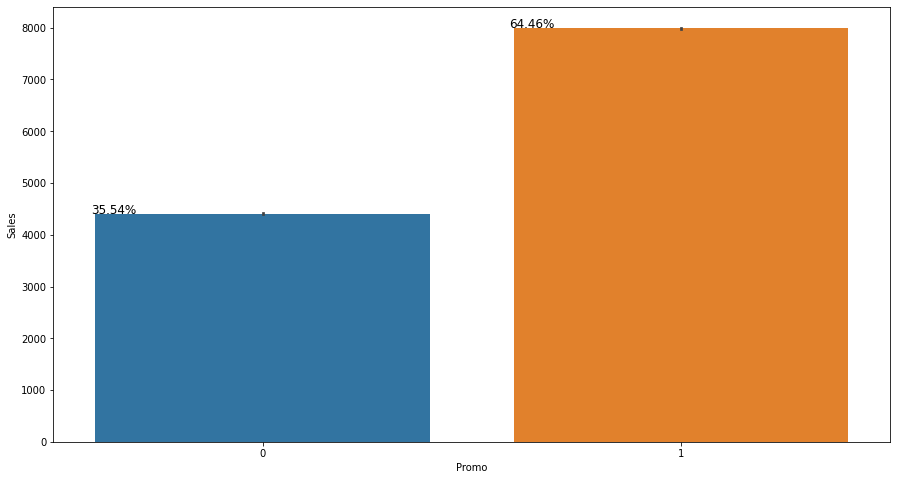

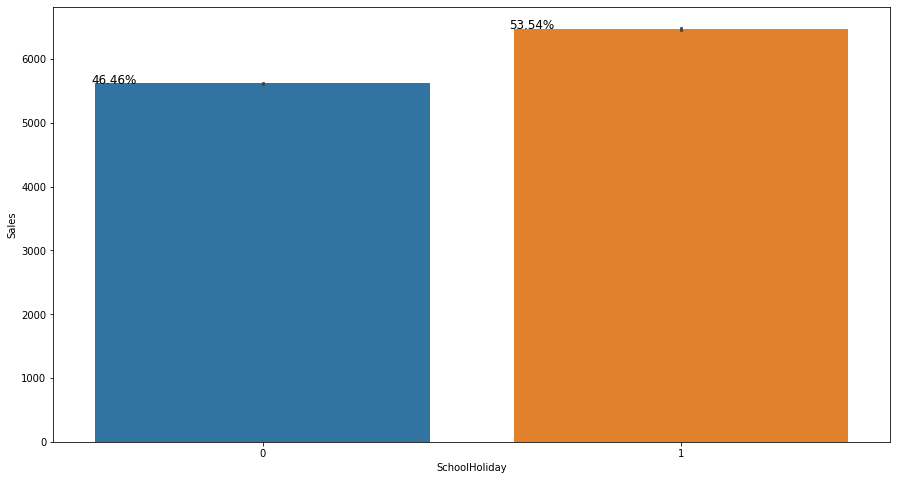

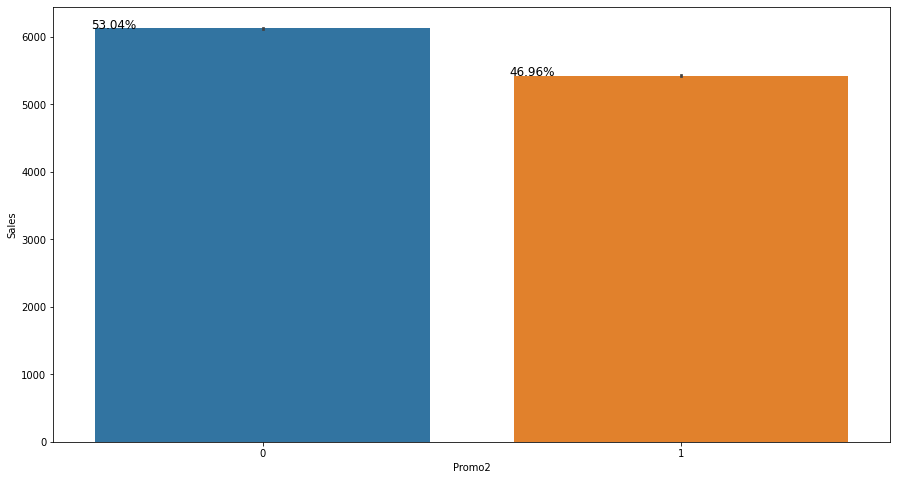

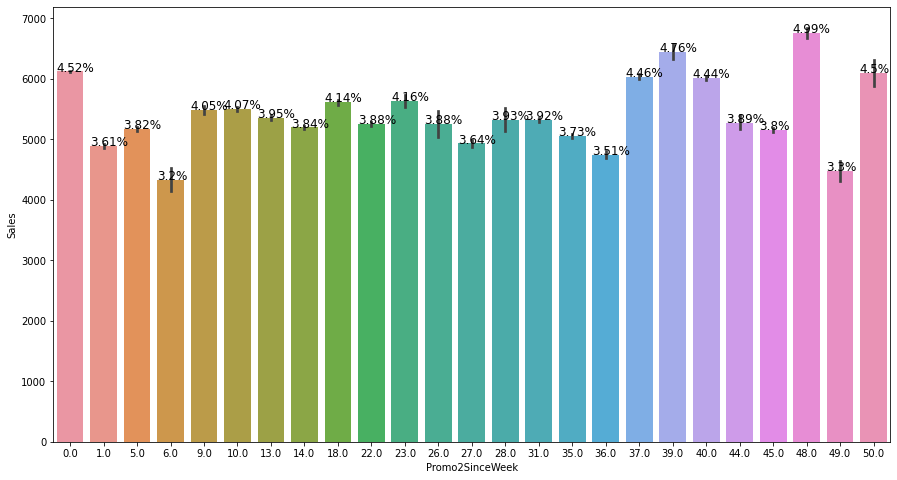

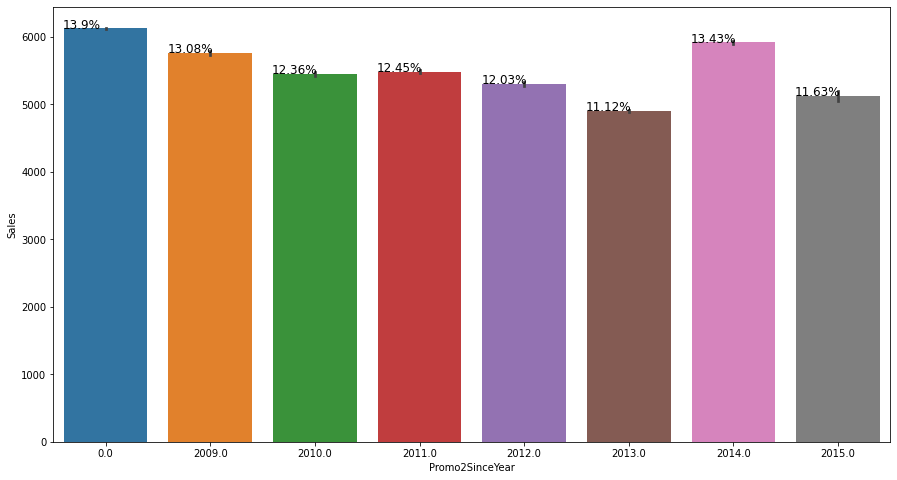

In [55]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them

for col in categorical_features:
  fig = plt.figure(figsize=(15, 8))
  ax = sns.barplot(x=sale_df[col], y=sale_df['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

# **Observations:**

1) StateHoliday column indicates a state holiday. Normally all stores, with few 
   exceptions, are closed on state holidays. a = public holiday, b = Easter     holiday, c = Christmas, 0 = None. From the above bar chart we can say that lowest sales were recorded during c types of state holidays i.e. christmas.





2) b storeType records the highest sales among all the 4 storetypes - a, b, c, d.

3) Highest sales were seen with Assortment levels-b which is 'extra'.

4) Highest sales were record on Mondays and lowest on Sundays. Most probably because stores remain closed on Sundays.

5) Promo clearly leads to more sales.

6) Promo2 doesn't really have much affect on sales.

7) More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays. 



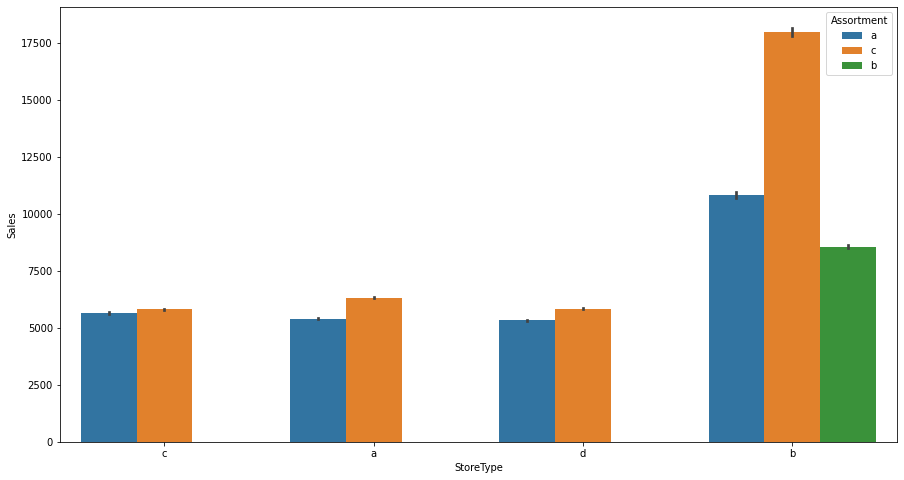

In [56]:
#Let's check the relationship between store type, assortment levels and sales
fig = plt.figure(figsize=(15, 8))
sns.barplot(x=sale_df["StoreType"],y=sale_df['Sales'],hue=sale_df["Assortment"])

# **Observations:**

**a,c and d StoreTypes have only a and c assortment types whereas the b storetype has all the 3 types of assortments. Hence it records the highest sales as seen earlier.** 

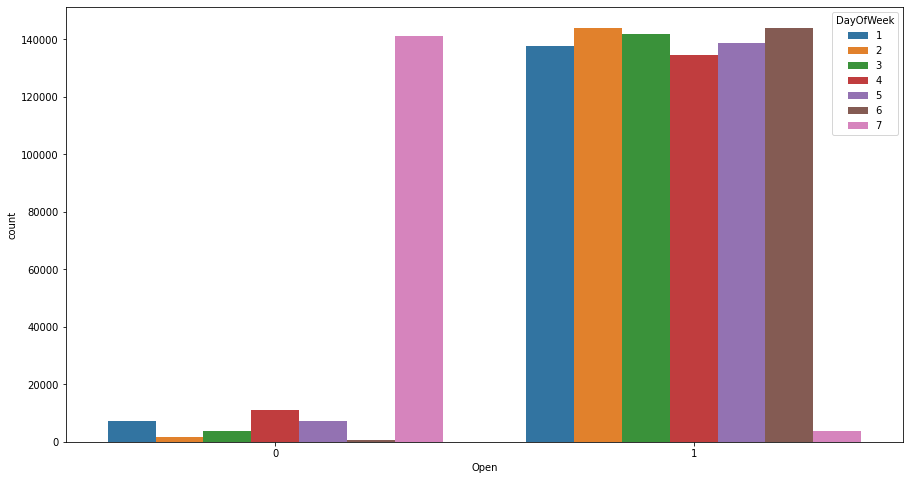

In [57]:
#Lets see open, how many shops are open on which days 
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
fig = plt.figure(figsize=(15, 8))
sns.countplot(x=sale_df["Open"], hue=sale_df["DayOfWeek"])

# **Observations:**

**Some of the stores were closed during the weekdays as well accounting to refurbishment or holidays.**

# **Feature Engineering**

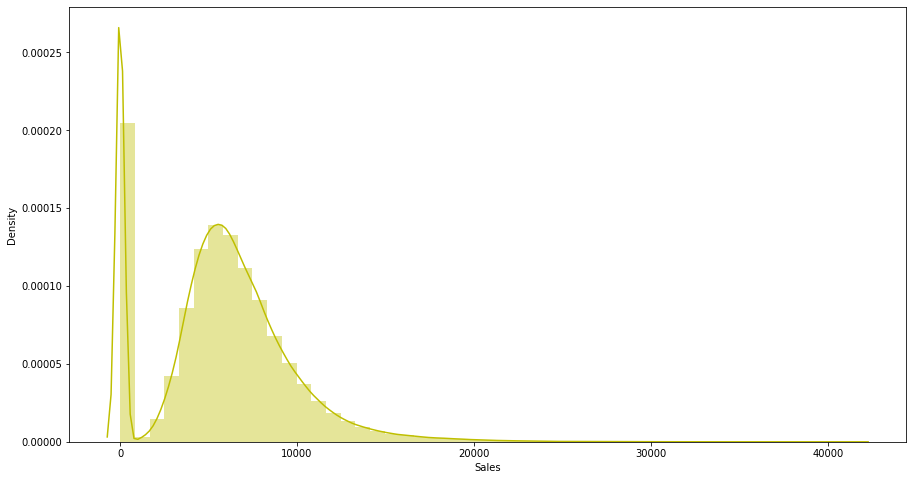

In [58]:
# Check the distribution of Dependent variable 'Sales'
plt.figure(figsize=(15,8))
sns.distplot(sale_df['Sales'],color="y")

**Next, notice that the sales are zero whenever the store is closed.**

In [59]:
sale_df[sale_df.Open == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

We will consider only those sales when the stores were opened.

In [60]:
sale_df1 = sale_df[sale_df.Open != 0]

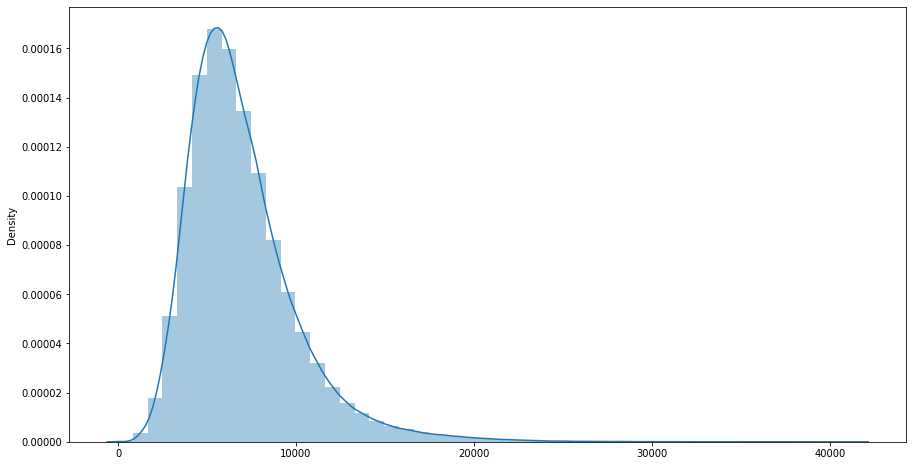

In [62]:
#distribution plot of Sales, as expected positively skewed
plt.figure(figsize=(15,8))
sns.distplot(x=sale_df1['Sales'])

In [63]:
## transformation
sale_df1['Sales'] = np.log(sale_df1['Sales'])

In [64]:
sale_df1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen
0,1,5,2015-07-31,8.568456,555,1,1,0,1,...,0,0.0,0.0,0,2015,7,31,212,82.0
1,1,4,2015-07-30,8.521185,546,1,1,0,1,...,0,0.0,0.0,0,2015,7,31,211,82.0
2,1,3,2015-07-29,8.472614,523,1,1,0,1,...,0,0.0,0.0,0,2015,7,31,210,82.0
3,1,2,2015-07-28,8.519391,560,1,1,0,1,...,0,0.0,0.0,0,2015,7,31,209,82.0
4,1,1,2015-07-27,8.716372,612,1,1,0,1,...,0,0.0,0.0,0,2015,7,31,208,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,1,2013-01-07,8.840001,471,1,1,0,1,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,7,0.0
1017204,1115,6,2013-01-05,8.470311,339,1,0,0,1,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,5,0.0
1017205,1115,5,2013-01-04,8.420682,326,1,0,0,1,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,4,0.0
1017206,1115,4,2013-01-03,8.365672,300,1,0,0,1,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,3,0.0


In [65]:
sale_df1[sale_df1['Sales'] == float("-inf")]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen
22589,25,4,2014-02-13,-inf,0,1,0,0,0,...,0,0.0,0.0,0,2014,2,7,44,130.0
22590,25,3,2014-02-12,-inf,0,1,0,0,0,...,0,0.0,0.0,0,2014,2,7,43,130.0
25212,28,4,2014-09-04,-inf,0,1,1,0,0,...,1,6.0,2015.0,"Mar,Jun,Sept,Dec",2014,9,36,247,0.0
25213,28,3,2014-09-03,-inf,0,1,1,0,1,...,1,6.0,2015.0,"Mar,Jun,Sept,Dec",2014,9,36,246,0.0
25214,28,2,2014-09-02,-inf,0,1,1,0,1,...,1,6.0,2015.0,"Mar,Jun,Sept,Dec",2014,9,36,245,0.0
51491,57,2,2014-07-01,-inf,0,1,1,0,0,...,0,0.0,0.0,0,2014,7,27,182,1.0
92570,102,4,2014-07-24,-inf,0,1,0,0,1,...,1,10.0,2014.0,"Mar,Jun,Sept,Dec",2014,7,30,205,79.0
92582,102,6,2014-07-12,-inf,0,1,0,0,0,...,1,10.0,2014.0,"Mar,Jun,Sept,Dec",2014,7,28,193,79.0
205303,227,4,2014-09-11,-inf,0,1,0,0,0,...,0,0.0,0.0,0,2014,9,37,254,12.0
210424,232,4,2013-01-24,-inf,0,1,1,0,0,...,1,10.0,2013.0,"Mar,Jun,Sept,Dec",2013,1,4,24,32.0


In [66]:
sale_df1.drop(sale_df1[sale_df1['Sales'] == float("-inf")].index,inplace=True)

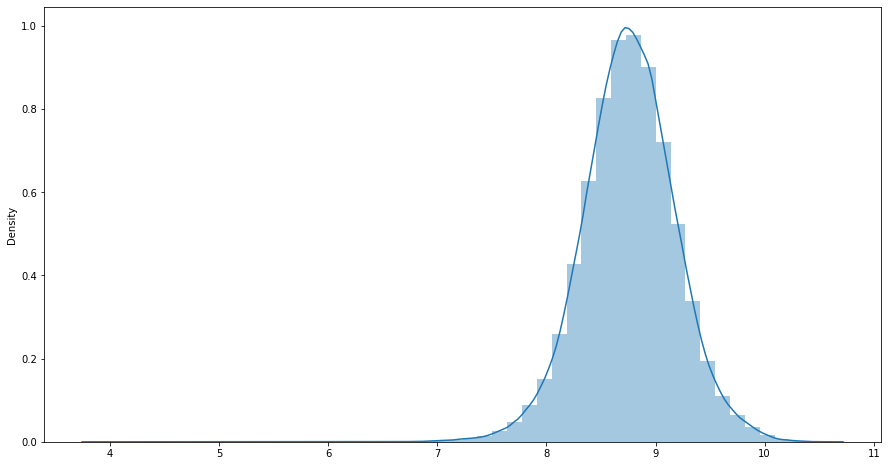

In [67]:
#distribution plot of Sales
plt.figure(figsize=(15,8))
sns.distplot(x=sale_df1['Sales'])

# **Outlier detection by z scores**

Total number of Outliers present in the Sales column are 1559.


[Text(0.5, 1.0, 'Outliers Distribution')]

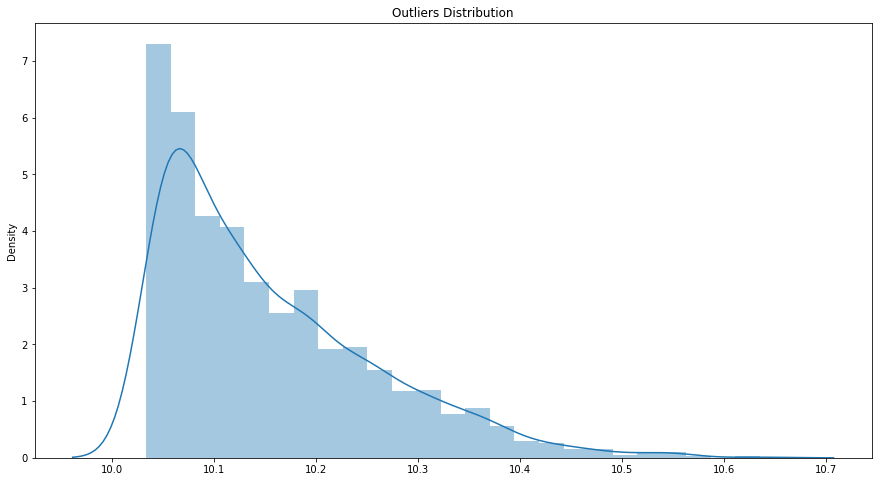

In [68]:
#code to seperate outliers
mean_sales = np.mean(sale_df1['Sales']) #mean
sd_sales = np.std(sale_df1['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in sale_df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
plt.figure(figsize=(15,8))
sns.distplot(x=outliers).set(title='Outliers Distribution')

**The data points with sales value higher than 10.2 are very low and hence they an be considered as outliers. The percentage of outliers in our dataset:**

In [69]:
#percentage of sales greater than 10.2
sales_outliers = sale_df1.loc[sale_df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(sale_df1))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.050809036191667316


In [70]:
sales_outliers

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen
51505,57,2,2014-06-17,10.454264,1930,1,1,0,0,...,0,0.0,0.0,0,2014,6,25,168,0.0
51506,57,1,2014-06-16,10.546315,1970,1,1,0,0,...,0,0.0,0.0,0,2014,6,25,167,0.0
51688,57,1,2013-12-16,10.279798,2009,1,1,0,0,...,0,0.0,0.0,0,2013,12,51,350,0.0
96712,106,1,2013-07-15,10.380374,1758,1,1,0,1,...,0,0.0,0.0,0,2013,7,29,196,0.0
111775,123,1,2014-08-18,10.292179,1729,1,1,0,1,...,0,0.0,0.0,0,2014,8,34,230,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015933,1114,6,2013-11-30,10.339805,4578,1,0,0,0,...,0,0.0,0.0,0,2013,11,48,334,2.0
1016057,1114,1,2013-07-29,10.232396,4133,1,1,0,1,...,0,0.0,0.0,0,2013,7,31,210,0.0
1016145,1114,4,2013-05-02,10.227164,4335,1,1,0,1,...,0,0.0,0.0,0,2013,5,18,122,0.0
1016178,1114,6,2013-03-30,10.245835,3944,1,0,0,0,...,0,0.0,0.0,0,2013,3,13,89,0.0


In [71]:
# Checking the stores which have promo
pd.set_option('display.max_columns', 23)
sales_outliers[sales_outliers['Promo']==1]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen
51505,57,2,2014-06-17,10.454264,1930,1,1,0,0,d,c,420.0,6.0,2014.0,0,0.0,0.0,0,2014,6,25,168,0.0
51506,57,1,2014-06-16,10.546315,1970,1,1,0,0,d,c,420.0,6.0,2014.0,0,0.0,0.0,0,2014,6,25,167,0.0
51688,57,1,2013-12-16,10.279798,2009,1,1,0,0,d,c,420.0,6.0,2014.0,0,0.0,0.0,0,2013,12,51,350,0.0
96712,106,1,2013-07-15,10.380374,1758,1,1,0,1,a,a,1390.0,8.0,2013.0,0,0.0,0.0,0,2013,7,29,196,0.0
111775,123,1,2014-08-18,10.292179,1729,1,1,0,1,a,a,16760.0,9.0,2011.0,0,0.0,0.0,0,2014,8,34,230,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015917,1114,1,2013-12-16,10.409944,4314,1,1,0,0,a,c,870.0,9.0,2013.0,0,0.0,0.0,0,2013,12,51,350,3.0
1015931,1114,1,2013-12-02,10.309919,3855,1,1,0,0,a,c,870.0,9.0,2013.0,0,0.0,0.0,0,2013,12,49,336,3.0
1016057,1114,1,2013-07-29,10.232396,4133,1,1,0,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0,2013,7,31,210,0.0
1016145,1114,4,2013-05-02,10.227164,4335,1,1,0,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0,2013,5,18,122,0.0


In [72]:
pd.set_option('display.max_columns', 23)
sales_outliers[sales_outliers['StoreType']=='b']

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen
237403,262,7,2015-07-26,10.390440,4783,1,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,7,30,207,26.0
237410,262,7,2015-07-19,10.362967,4691,1,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,7,29,200,26.0
237417,262,7,2015-07-12,10.381924,4623,1,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,7,28,193,26.0
237424,262,7,2015-07-05,10.317417,4762,1,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,7,27,186,26.0
237431,262,7,2015-06-28,10.268721,4450,1,0,0,0,b,a,1180.0,5.0,2013.0,0,0.0,0.0,0,2015,6,26,179,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304732,335,1,2013-12-16,10.301827,3889,1,1,0,0,b,a,90.0,9.0,2013.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,12,51,350,3.0
511946,562,1,2014-12-15,10.210347,3851,1,1,0,0,b,c,1210.0,9.0,2013.0,0,0.0,0.0,0,2014,12,51,349,15.0
511956,562,5,2014-12-05,10.229765,4081,1,1,0,0,b,c,1210.0,9.0,2013.0,0,0.0,0.0,0,2014,12,49,339,15.0
512310,562,1,2013-12-16,10.263955,3931,1,1,0,0,b,c,1210.0,9.0,2013.0,0,0.0,0.0,0,2013,12,51,350,3.0


In [73]:
pd.set_option('display.max_columns', 23)
sales_outliers[sales_outliers['Customers']>3000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen
227252,251,1,2015-06-29,10.263397,3088,1,1,0,1,a,c,340.0,9.0,2013.0,0,0.0,0.0,0,2015,6,27,180,21.0
227440,251,2,2014-12-23,10.371301,4180,1,0,0,1,a,c,340.0,9.0,2013.0,0,0.0,0.0,0,2014,12,52,357,15.0
227441,251,1,2014-12-22,10.433645,4264,1,0,0,1,a,c,340.0,9.0,2013.0,0,0.0,0.0,0,2014,12,52,356,15.0
227445,251,4,2014-12-18,10.217495,3402,1,1,0,0,a,c,340.0,9.0,2013.0,0,0.0,0.0,0,2014,12,51,352,15.0
227447,251,2,2014-12-16,10.345092,3590,1,1,0,0,a,c,340.0,9.0,2013.0,0,0.0,0.0,0,2014,12,51,350,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015933,1114,6,2013-11-30,10.339805,4578,1,0,0,0,a,c,870.0,9.0,2013.0,0,0.0,0.0,0,2013,11,48,334,2.0
1016057,1114,1,2013-07-29,10.232396,4133,1,1,0,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0,2013,7,31,210,0.0
1016145,1114,4,2013-05-02,10.227164,4335,1,1,0,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0,2013,5,18,122,0.0
1016178,1114,6,2013-03-30,10.245835,3944,1,0,0,0,a,c,870.0,9.0,2013.0,0,0.0,0.0,0,2013,3,13,89,0.0


# **Observations:**

Some interesting insights can be drawn from these outliers dataframe:

1) Most of the stores are running promo.

2) Almost all of these datapoints have high customer count. 341 stores out of 429 have customers greater than 3000.

3) Some of the stores are of b type.

It would not be wise to treat them because the reasons behind this behaviour seems fair and important from the business point of view. 

# **Detecting multicollinearity**

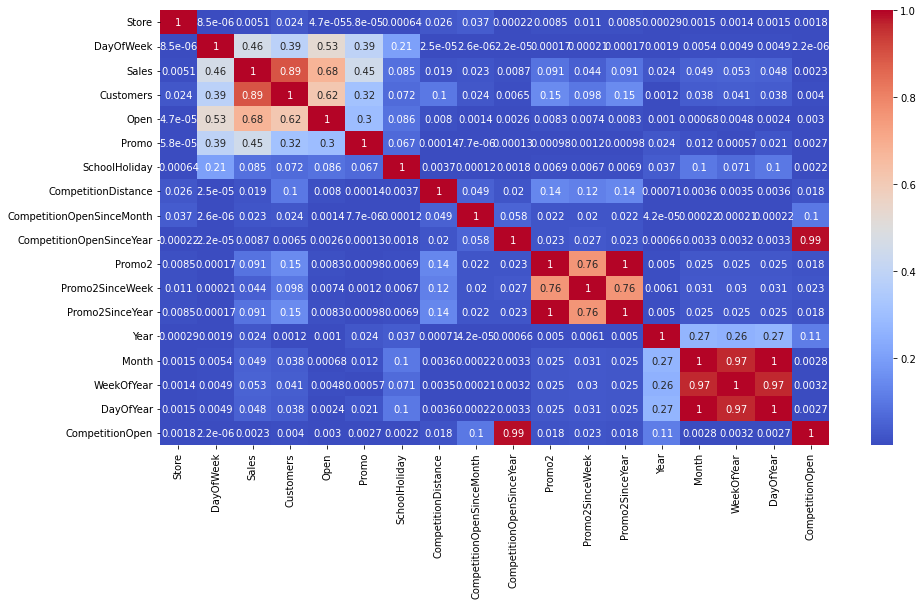

In [74]:
## Correlation
plt.figure(figsize=(15,8))
correlation = sale_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [75]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [76]:
pd.options.display.float_format = '{:.4f}'.format
calc_vif(sale_df[[i for i in sale_df.describe().columns if i not in ['Store','Sales']]])

,variables,VIF
0,DayOfWeek,7.8831
1,Customers,5.1209
2,Open,11.5765
3,Promo,2.0330
4,SchoolHoliday,1.3073
5,CompetitionDistance,1.5812
6,CompetitionOpenSinceMonth,15.0530
7,CompetitionOpenSinceYear,42987505.1672
8,Promo2,1565440.7777
9,Promo2SinceWeek,3.9760


**From the heatmap we can see that month, WeekOfYear and DayOfYear are highly correlated with each other and WeekOfYear has the highest affect on Sales. So we will drop Month and DayOfYear.**

In [77]:
sale_df.drop(['Month','DayOfYear'],axis=1,inplace=True)

In [78]:
pd.options.display.float_format = '{:.4f}'.format
calc_vif(sale_df[[i for i in sale_df.describe().columns if i not in ['Store','Sales']]])

,variables,VIF
0,DayOfWeek,7.8827
1,Customers,5.1189
2,Open,11.5364
3,Promo,1.9912
4,SchoolHoliday,1.2801
5,CompetitionDistance,1.5811
6,CompetitionOpenSinceMonth,14.7995
7,CompetitionOpenSinceYear,41204162.8227
8,Promo2,1565420.3652
9,Promo2SinceWeek,3.9759


**From the heatmap we can see that promo2, promo2SinceWeek and promo2SinceYear are having high correlation and promo2 has the highest affect on sales. So we will drop promo2SinceWeek and promo2SinceYear.**

In [79]:
sale_df.drop(['Promo2SinceWeek','Promo2SinceYear'],axis=1,inplace=True)

In [80]:
pd.options.display.float_format = '{:.4f}'.format
calc_vif(sale_df[[i for i in sale_df.describe().columns if i not in ['Store','Sales']]])

,variables,VIF
0,DayOfWeek,7.8827
1,Customers,5.1118
2,Open,11.5317
3,Promo,1.9911
4,SchoolHoliday,1.2801
5,CompetitionDistance,1.5752
6,CompetitionOpenSinceMonth,14.7969
7,CompetitionOpenSinceYear,41202505.6696
8,Promo2,2.1409
9,Year,41371470.1109


**From heatmap we can see that CompetitionOpen and CompetitionOpenSinceYear are highly correlated. So we will drop CompetitionOpenSinceYear.**

In [81]:
sale_df.drop(['CompetitionOpenSinceYear'],axis=1,inplace=True)

In [82]:
pd.options.display.float_format = '{:.4f}'.format
calc_vif(sale_df[[i for i in sale_df.describe().columns if i not in ['Store','Sales']]])

,variables,VIF
0,DayOfWeek,7.8825
1,Customers,5.1115
2,Open,11.5316
3,Promo,1.9908
4,SchoolHoliday,1.2789
5,CompetitionDistance,1.5745
6,CompetitionOpenSinceMonth,8.9915
7,Promo2,2.1383
8,Year,36.0386
9,WeekOfYear,3.7052


In [83]:
sale_df.drop(['CompetitionOpenSinceMonth'],axis=1,inplace=True)

In [84]:
pd.options.display.float_format = '{:.4f}'.format
calc_vif(sale_df[[i for i in sale_df.describe().columns if i not in ['Store','Sales']]])

,variables,VIF
0,DayOfWeek,7.8825
1,Customers,5.1043
2,Open,11.5263
3,Promo,1.9907
4,SchoolHoliday,1.2789
5,CompetitionDistance,1.5699
6,Promo2,2.1382
7,Year,27.4981
8,WeekOfYear,3.7051
9,CompetitionOpen,1.4875


In [85]:
sale_df.drop(['Year'],axis=1,inplace=True)

In [86]:
pd.options.display.float_format = '{:.4f}'.format
calc_vif(sale_df[[i for i in sale_df.describe().columns if i not in ['Store','Sales']]])

,variables,VIF
0,DayOfWeek,3.1338
1,Customers,5.0742
2,Open,7.9294
3,Promo,1.8839
4,SchoolHoliday,1.2403
5,CompetitionDistance,1.5244
6,Promo2,2.0196
7,WeekOfYear,3.3734
8,CompetitionOpen,1.4610


In [87]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   StoreType            1017209 non-null  object        
 10  Assortment           1017209 non-null  object        
 11  CompetitionDistance  1017209 non-null  float64       
 12  Promo2               1017209 non-null  int64         
 1

**Dropping PromoInterval and Store as they don't affect our sales.**


In [88]:
sale_df.drop(['Store'],axis=1,inplace=True)

In [89]:
sale_df.drop('PromoInterval',axis=1,inplace=True)

In [90]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   DayOfWeek            1017209 non-null  int64         
 1   Date                 1017209 non-null  datetime64[ns]
 2   Sales                1017209 non-null  int64         
 3   Customers            1017209 non-null  int64         
 4   Open                 1017209 non-null  int64         
 5   Promo                1017209 non-null  int64         
 6   StateHoliday         1017209 non-null  object        
 7   SchoolHoliday        1017209 non-null  int64         
 8   StoreType            1017209 non-null  object        
 9   Assortment           1017209 non-null  object        
 10  CompetitionDistance  1017209 non-null  float64       
 11  Promo2               1017209 non-null  int64         
 12  WeekOfYear           1017209 non-null  int64         
 1

In [91]:
sale_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [92]:
sale_df['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [93]:
sale_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [94]:
sale_df['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [95]:
sale_df['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [96]:
sale_df['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [97]:
sale_df['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

In [98]:
correlation.Sales

Store                        0.0051
DayOfWeek                   -0.4621
Sales                        1.0000
Customers                    0.8947
Open                         0.6785
Promo                        0.4523
SchoolHoliday                0.0851
CompetitionDistance         -0.0189
CompetitionOpenSinceMonth   -0.0232
CompetitionOpenSinceYear     0.0087
Promo2                      -0.0910
Promo2SinceWeek             -0.0441
Promo2SinceYear             -0.0911
Year                         0.0235
Month                        0.0488
WeekOfYear                   0.0529
DayOfYear                    0.0475
CompetitionOpen             -0.0023
Name: Sales, dtype: float64

In [99]:
sale_df1 = sale_df.copy()

In [100]:
sale_df1.head(10)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,WeekOfYear,CompetitionOpen
0,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0000,0,31,82.0000
1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0000,0,31,82.0000
2,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0000,0,31,82.0000
3,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0000,0,31,82.0000
4,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0000,0,31,82.0000
5,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0000,0,30,82.0000
6,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0000,0,30,82.0000
7,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0000,0,30,82.0000
8,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0000,0,30,82.0000
9,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0000,0,30,82.0000


**We will remove all the datapoints where open is equal to 0 since that will mean our sale is also 0.**

In [101]:
# Removing all the datapoints where Open is equal to 0
sale_df1 = sale_df1[sale_df1.Open != 0]

In [102]:
## transformation
sale_df1['Sales'] = np.log(sale_df1['Sales'])

In [103]:
sale_df1

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,WeekOfYear,CompetitionOpen
0,5,2015-07-31,8.5685,555,1,1,0,1,c,a,1270.0000,0,31,82.0000
1,4,2015-07-30,8.5212,546,1,1,0,1,c,a,1270.0000,0,31,82.0000
2,3,2015-07-29,8.4726,523,1,1,0,1,c,a,1270.0000,0,31,82.0000
3,2,2015-07-28,8.5194,560,1,1,0,1,c,a,1270.0000,0,31,82.0000
4,1,2015-07-27,8.7164,612,1,1,0,1,c,a,1270.0000,0,31,82.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1,2013-01-07,8.8400,471,1,1,0,1,d,c,5350.0000,1,2,0.0000
1017204,6,2013-01-05,8.4703,339,1,0,0,1,d,c,5350.0000,1,1,0.0000
1017205,5,2013-01-04,8.4207,326,1,0,0,1,d,c,5350.0000,1,1,0.0000
1017206,4,2013-01-03,8.3657,300,1,0,0,1,d,c,5350.0000,1,1,0.0000


In [104]:
sale_df1.drop(sale_df1[sale_df1['Sales'] == float("-inf")].index,inplace=True)

# **Hot encoding the categorical columns**

In [105]:
#changing into boolean 
sale_df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [106]:
# One hot encoding
sale_df1 = pd.get_dummies(sale_df1, columns=["StoreType", "Assortment","DayOfWeek"])

In [107]:
pd.set_option('display.max_columns',24 )
sale_df1

,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,WeekOfYear,CompetitionOpen,StoreType_a,...,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,2015-07-31,8.5685,555,1,1,0,1,1270.0000,0,31,82.0000,0,...,1,0,1,0,0,0,0,0,0,1,0,0
1,2015-07-30,8.5212,546,1,1,0,1,1270.0000,0,31,82.0000,0,...,1,0,1,0,0,0,0,0,1,0,0,0
2,2015-07-29,8.4726,523,1,1,0,1,1270.0000,0,31,82.0000,0,...,1,0,1,0,0,0,0,1,0,0,0,0
3,2015-07-28,8.5194,560,1,1,0,1,1270.0000,0,31,82.0000,0,...,1,0,1,0,0,0,1,0,0,0,0,0
4,2015-07-27,8.7164,612,1,1,0,1,1270.0000,0,31,82.0000,0,...,1,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,2013-01-07,8.8400,471,1,1,0,1,5350.0000,1,2,0.0000,0,...,0,1,0,0,1,1,0,0,0,0,0,0
1017204,2013-01-05,8.4703,339,1,0,0,1,5350.0000,1,1,0.0000,0,...,0,1,0,0,1,0,0,0,0,0,1,0
1017205,2013-01-04,8.4207,326,1,0,0,1,5350.0000,1,1,0.0000,0,...,0,1,0,0,1,0,0,0,0,1,0,0
1017206,2013-01-03,8.3657,300,1,0,0,1,5350.0000,1,1,0.0000,0,...,0,1,0,0,1,0,0,0,1,0,0,0


In [108]:
sale_df2 = sale_df1.copy()

In [109]:
features=['Customers','CompetitionDistance','CompetitionOpen','Open','Promo','StateHoliday','SchoolHoliday','Promo2','WeekOfYear','StoreType_a','StoreType_b','StoreType_c','StoreType_d','Assortment_a','Assortment_b','Assortment_c','DayOfWeek_1','DayOfWeek_2','DayOfWeek_3','DayOfWeek_4','DayOfWeek_5','DayOfWeek_6','DayOfWeek_7']

In [110]:
#setting date and store as index
sale_df2.set_index(['Date'],inplace=True)
#sorting index following the time series
sale_df2.sort_index(inplace=True)

In [111]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = sale_df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = sale_df2.loc[start_test:end_test]

# **Splitting the dataset into train and test datasets.**

In [112]:
#X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (798486, 23)
The shape of y_train is: (798486, 1)
The shape of X_test is: (45852, 23)
The shape of y_test is: (45852, 1)


# **Scaling**

In [113]:
# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

# **Linear Regression**

In [114]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [115]:
print("Regression score on the training dataset",reg.score(X_train, y_train))
print("Regression score on the validation dataset",reg.score(X_test, y_test))
print("Regression intercept",reg.intercept_)
print("Learnable parameters", reg.coef_)

Regression score on the training dataset 0.7469385369711291
Regression score on the validation dataset 0.7396307338007406
Regression intercept [0.00011566]
Learnable parameters [[ 8.72820821e-01  5.74660724e+11  2.34985226e-01 -6.93705052e-03
   1.22756915e-02  5.52413338e-02  3.81687311e-02  2.32002527e-02
   1.12588826e-02  1.68074500e+12  4.54361982e+11  1.14861423e+12
   1.55468404e+12  7.48725955e+11  1.47356181e+11  7.47800886e+11
   1.92986679e+11  1.96739185e+11  1.95564348e+11  1.91213559e+11
   1.93629795e+11  1.97431409e+11  3.40626140e+10]]


In [116]:
y_pred_test = reg.predict(X_test)

In [117]:
y_pred_train = reg.predict(X_train)

In [118]:
# Evaluation metrices of the train dataset
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE  = mean_squared_error((y_train), (y_pred_train))
print("MSE of the train dataset is :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE of the train dataset is :" ,RMSE)

r2 = r2_score((y_train), (y_pred_train))
print("R2 score of the train dataset is :" ,r2)
print("Adjusted R2 of the train dataset is : ",1-(1-r2_score((y_train),(y_pred_train)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MAE_test = round(mean_absolute_error(y_train,y_pred_train),6)
print("Mean Absolute error of the validation dataset is:", MAE_test)

MSE of the train dataset is : 0.25306146302887095
RMSE of the train dataset is : 0.5030521474249672
R2 score of the train dataset is : 0.7469385369711291
Adjusted R2 of the train dataset is :  0.7468115313490278
Mean Absolute error of the validation dataset is: 0.377372


In [119]:
# Evaluation metrices of the test dataset

MSE  = mean_squared_error((y_test), (y_pred_test))
print("MSE of the validation dataset is :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE of the validation dataset is :" ,RMSE)

r2 = r2_score((y_test), (y_pred_test))
print("R2 score of the validation dataset is :" ,r2)
print("Adjusted R2 of the validation dataset is : ",1-(1-r2_score((y_test),(y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
print("Mean Absolute error of the validation dataset is:", MAE_test)

MSE of the validation dataset is : 0.24526054237490344
RMSE of the validation dataset is : 0.4952378644398098
R2 score of the validation dataset is : 0.7396307338007406
Adjusted R2 of the validation dataset is :  0.7395000605633621
Mean Absolute error of the validation dataset is: 0.378328


In [120]:
y_pred_test.shape

(45852, 1)

(array([735764., 735771., 735780., 735787., 735794., 735801., 735811.]),
 <a list of 7 Text major ticklabel objects>)

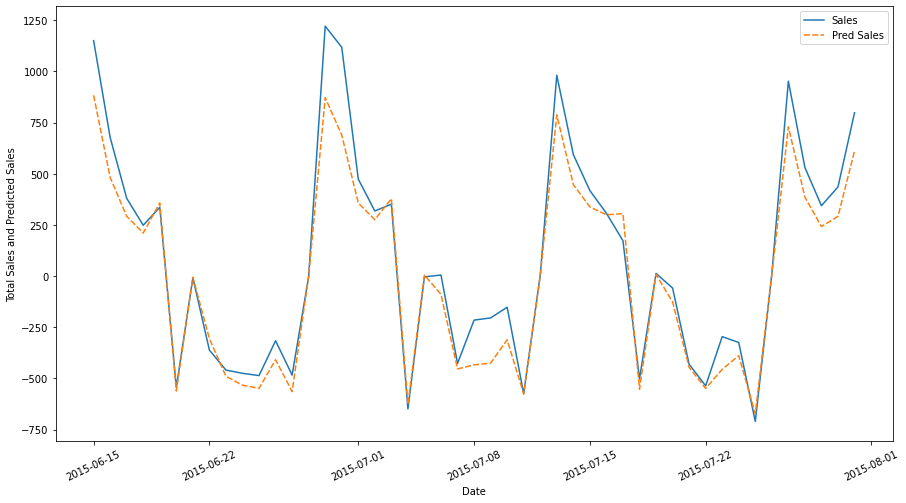

In [121]:
c= y_test.copy()
c['Pred Sales'] = y_pred_test
plt.figure(figsize=(15,8))
plot = c.groupby('Date')['Sales','Pred Sales'].sum()
sns.lineplot(data = plot)
plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation = 25)

**As we can see the R2 score on the train dataset is 0.74 and R2 score on the test dataset is 0.73. As a lot of categorical features are present in our dataset so linear regression is not a suitable model. Next We will implement decision tree and see how our prediction goes.**

# **Decision Tree**

In [122]:
from sklearn.tree import DecisionTreeRegressor
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [123]:
y_predicted_train_dt = regressor.predict(X_train)

In [124]:
y_predicted_test_dt = regressor.predict(X_test)

In [125]:
# Evaluation metrices for the train dataset

r2 = r2_score((y_train), (y_predicted_train_dt))
print("R2 score of the training dataset is :" ,r2)
print("Adjusted R2 of the training dataset is: ",1-(1-r2_score((y_train), (y_predicted_train_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE  = mean_squared_error((y_train), (y_predicted_train_dt))
print("MSE of the training dataset is :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE of the training dataset is :" ,RMSE)

MAE_test = round(mean_absolute_error(y_train,y_predicted_train_dt),6)
print("Mean Absolute error of the training dataset is:", MAE_test)

R2 score of the training dataset is : 0.9999953310729396
Adjusted R2 of the training dataset is:  0.9999953287297144
MSE of the training dataset is : 4.668927060420779e-06
RMSE of the training dataset is : 0.00216077001562424
Mean Absolute error of the training dataset is: 2.8e-05


In [126]:
# Evaluation metrices for the test dataset

r2 = r2_score((y_test), (y_predicted_test_dt))
print("R2 score of the validation dataset is :" ,r2)
print("Adjusted R2 of the validation dataset is: ",1-(1-r2_score((y_test), (y_predicted_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE  = mean_squared_error((y_test), (y_predicted_test_dt))
print("MSE of the validation dataset is :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE of the validation dataset is :" ,RMSE)

MAE_test = round(mean_absolute_error(y_test,y_predicted_test_dt),6)
print("Mean Absolute error of the validation dataset is:", MAE_test)


R2 score of the validation dataset is : 0.926127649930085
Adjusted R2 of the validation dataset is:  0.9260905751275275
MSE of the validation dataset is : 0.0695856807876491
RMSE of the validation dataset is : 0.26379097935230666
Mean Absolute error of the validation dataset is: 0.191538


(array([735764., 735771., 735780., 735787., 735794., 735801., 735811.]),
 <a list of 7 Text major ticklabel objects>)

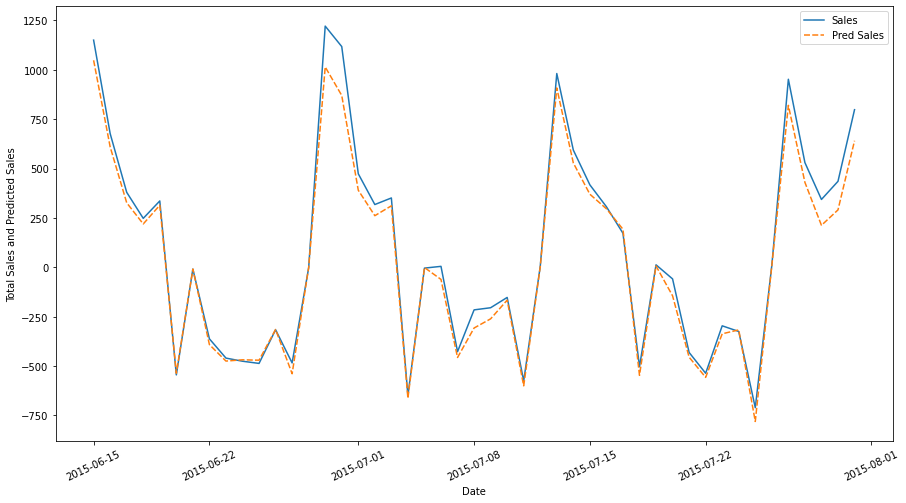

In [127]:
a= y_test.copy()
a['Pred Sales'] = y_predicted_test_dt.tolist()
plt.figure(figsize=(15,8))
plot = a.groupby('Date')['Sales','Pred Sales'].sum()
sns.lineplot(data = plot)
plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation = 25)

<BarContainer object of 23 artists>

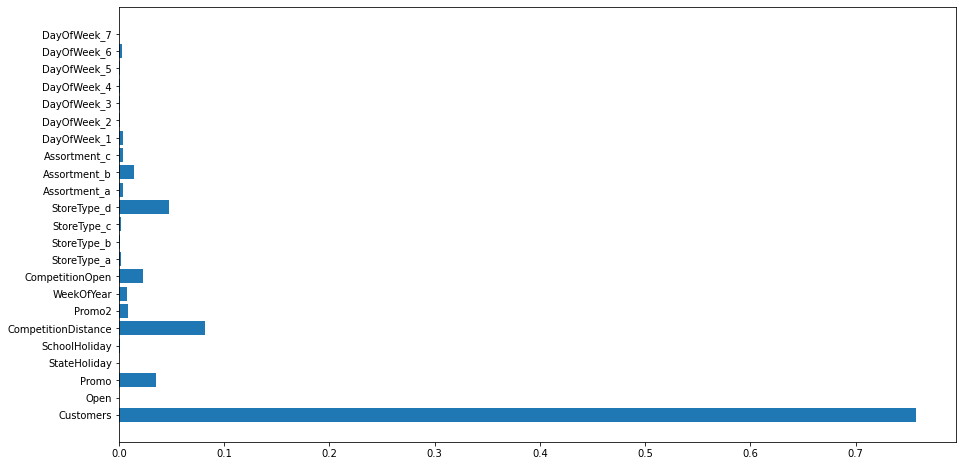

In [128]:
plt.figure(figsize=(15,8))
plt.barh(X_train.columns, regressor.feature_importances_)

**Adjusted R2 score on the test dataset is 92.60%. From the graph as well we can see most of the predictions are very close to the actual values. Hence we will choose decision tree as our baseline model.**

# **Random Forest**

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
#fitting 
random_forest = RandomForestRegressor(n_estimators=100,random_state=20)
random_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=20)

In [131]:
y_predicted_train_rf = random_forest.predict(X_train)
y_predicted_test_rf = random_forest.predict(X_test)

In [132]:
# Evaluation metrices for the train dataset

r2 = r2_score((y_train), (y_predicted_train_rf))
print("R2 score of the training dataset is :" ,r2)
print("Adjusted R2 of the training dataset is: ",1-(1-r2_score((y_train), (y_predicted_train_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE  = mean_squared_error((y_train), (y_predicted_train_rf))
print("MSE of the training dataset is :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE of the training dataset is :" ,RMSE)

MAE_test = round(mean_absolute_error(y_train,y_predicted_train_rf),6)
print("Mean Absolute error of the training dataset is:", MAE_test)

R2 score of the training dataset is : 0.9964331802652459
Adjusted R2 of the training dataset is:  0.9964313901619487
MSE of the training dataset is : 0.0035668197347540906
RMSE of the training dataset is : 0.05972285772427581
Mean Absolute error of the training dataset is: 0.043645


In [133]:
# Evaluation metrices for the test dataset

r2 = r2_score((y_test), (y_predicted_test_rf))
print("R2 score of the validation dataset is :" ,r2)
print("Adjusted R2 of the validation dataset is: ",1-(1-r2_score((y_test), (y_predicted_test_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE  = mean_squared_error((y_test), (y_predicted_test_rf))
print("MSE of the validation dataset is :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE of the validation dataset is :" ,RMSE)

MAE_test = round(mean_absolute_error(y_test,y_predicted_test_rf),6)
print("Mean Absolute error of the validation dataset is:", MAE_test)

R2 score of the validation dataset is : 0.96219399830011
Adjusted R2 of the validation dataset is:  0.9621750243531977
MSE of the validation dataset is : 0.035612192703440945
RMSE of the validation dataset is : 0.1887119304745753
Mean Absolute error of the validation dataset is: 0.142592


(array([735764., 735771., 735780., 735787., 735794., 735801., 735811.]),
 <a list of 7 Text major ticklabel objects>)

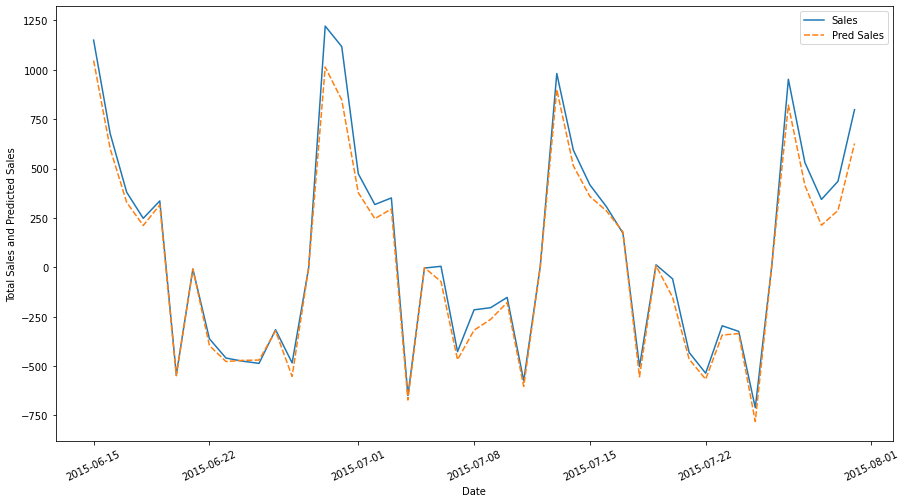

In [135]:
b= y_test.copy()
b['Pred Sales'] = y_predicted_test_rf.tolist()
plt.figure(figsize=(15,8))
plot = b.groupby('Date')['Sales','Pred Sales'].sum()
sns.lineplot(data = plot)
plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation = 25)

In [136]:
random_forest.feature_importances_

array([7.57018707e-01, 0.00000000e+00, 3.56270180e-02, 1.49296319e-04,
       9.39881395e-04, 8.03735366e-02, 8.48121733e-03, 8.68136960e-03,
       2.27110513e-02, 2.49745109e-03, 2.03515347e-03, 1.84671488e-03,
       4.87711276e-02, 3.61074339e-03, 1.34626569e-02, 3.62958804e-03,
       3.53592313e-03, 1.02964332e-03, 6.77575695e-04, 7.13976330e-04,
       1.05302813e-03, 2.87713449e-03, 2.77206406e-04])

<BarContainer object of 23 artists>

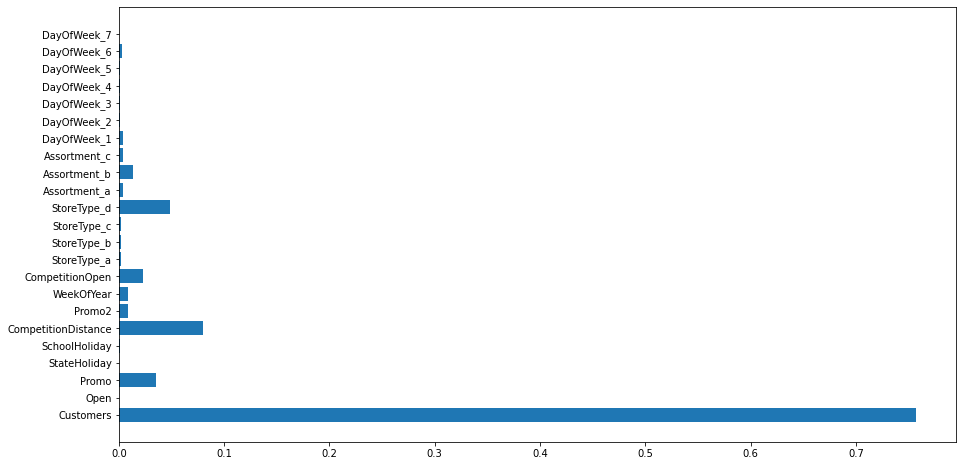

In [137]:
plt.figure(figsize=(15,8))
plt.barh(X_train.columns, random_forest.feature_importances_)

**Adjusted R2 score on our test dataset is 96.21% which is a good increase from our baseline model. Next we will tune the hyperparameters of random forest and see if we can increase our prediction power.**

# **Hyperparameter tuning**

In [132]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor() 
grid_values = {'n_estimators':[70, 100], 'max_depth':[15, 25],'min_samples_leaf':[2,4],'min_samples_split': [5, 10], 'max_features':['auto']}
rf = GridSearchCV(rf, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=3, verbose=2)

In [133]:
rf.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time= 1.9min
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time= 2.0min
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time= 1.9min
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 2.8min
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 2.8min
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 2.7min
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=70; total time= 1.9min
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=70; t

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 25], 'max_features': ['auto'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [70, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [134]:
random_t = rf.best_estimator_

In [135]:
random_t

RandomForestRegressor(max_depth=25, min_samples_leaf=2, min_samples_split=5)

In [136]:
print("The best fit hyperparameter values are found out to be :" ,rf.best_params_)
print("\nUsing ",rf.best_params_, " the negative mean squared error is: ", rf.best_score_)

The best fit hyperparameter values are found out to be : {'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Using  {'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}  the negative mean squared error is:  -0.0430476944476146


In [137]:
y_predicted_train_rf_tuned =  rf.predict(X_train)
y_predicted_test_rf_tuned  = rf.predict(X_test)

In [140]:
# Evaluation metrices for the train dataset

r2 = r2_score((y_train), (y_predicted_train_rf_tuned))
print("R2 score of the training dataset is :" ,r2)
print("Adjusted R2 of the training dataset is: ",1-(1-r2_score((y_train), (y_predicted_train_rf_tuned)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE  = mean_squared_error((y_train), (y_predicted_train_rf_tuned))
print("MSE of the training dataset is :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE of the training dataset is :" ,RMSE)

MAE_test = round(mean_absolute_error(y_train,y_predicted_train_rf_tuned),6)
print("Mean Absolute error of the training dataset is:", MAE_test)

R2 score of the training dataset is : 0.991395734471207
Adjusted R2 of the training dataset is:  0.9913914161918328
MSE of the training dataset is : 0.008604265528792995
RMSE of the training dataset is : 0.09275918029388247
Mean Absolute error of the training dataset is: 0.066717


In [139]:
# Evaluation metrices for the test dataset

r2 = r2_score((y_test), (y_predicted_test_rf_tuned))
print("R2 score of the validation dataset is :" ,r2)
print("Adjusted R2 of the validation dataset is: ",1-(1-r2_score((y_test), (y_predicted_test_rf_tuned)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE  = mean_squared_error((y_test), (y_predicted_test_rf_tuned))
print("MSE of the validation dataset is :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE of the validation dataset is :" ,RMSE)

MAE_test = round(mean_absolute_error(y_test,y_predicted_test_rf_tuned),6)
print("Mean Absolute error of the validation dataset is:", MAE_test)

R2 score of the validation dataset is : 0.9610029693795816
Adjusted R2 of the validation dataset is:  0.9609833976831457
MSE of the validation dataset is : 0.036734108524371284
RMSE of the validation dataset is : 0.19166144245614788
Mean Absolute error of the validation dataset is: 0.145032
R2 score of the validation dataset is : 0.9610029693795816
Adjusted R2 of the validation dataset is:  0.9609833976831457
MSE of the validation dataset is : 0.036734108524371284
RMSE of the validation dataset is : 0.19166144245614788
Mean Absolute error of the validation dataset is: 0.145032


**Adjusted R2 score on test dataset is 96.1%.**